# Initialisation

In [1]:
import write_files as wf
import ihp
import lpse_data as ld
import matplotlib.pyplot as plt
import numpy as np
from time import time as stopwatch
from calc_inputs import *

# Ipython magic features
%load_ext autoreload
%autoreload 2
  
# LPSE class
lpse = ld.lpse_case()
lpse.dfp = './data/lpse.' # Data file prefix
lpse.verbose = False # Show prints
lpse.np = 1 # Number of processors
lpse.bin = '/home/space/phrfqm/lpse-3.2.11/bin/lpse_cpu' # Binary

# Case setup

In [2]:
jc = wf.job_control()
jc.version = '3.2.11' 
jc.seed = 1 # 0 for random, otherwise fixed seed
jc.resources.heartbeatInterval = 0.1 # minutes
lpse.add_class(jc)

In [3]:
gr = wf.gridding()
gr.grid.sizes = 1.0 # microns
gr.grid.nodes = 10
gr.grid.antiAliasing.isAutomatic = 'false'
gr.grid.antiAliasing.range = 0.333
lpse.add_class(gr)

In [4]:
cm = wf.components()
cm.laser.enable = 'true'
cm.raman.enable = 'true'
cm.lw.enable = 'true'
lpse.add_class(cm)

In [26]:
tc = wf.temporal_control()
tc.simulation.samplePeriod = 0.05 # ps
tc.simulation.time.end = 0.5 # ps
lpse.add_class(tc)

In [6]:
io = wf.io_control()
io.grid.downSampleFactors = 1 # Spatial
io.laser.save.E0.z = lpse.dfp + 'E0_z'
io.raman.save.E0.z = lpse.dfp + 'E1_z'
io.lw.save.pots = lpse.dfp + 'pots'
io.raman.save.S0.x = lpse.dfp + 'S1_x'
lpse.add_class(io)

In [7]:
pp = wf.physical_parameters()
pp.physical.Z = 1.0
pp.physical.Te = 4.5 # keV
pp.physical.Ti = 4.5 # keV
pp.physical.MiOverMe = 1836.15
# pp.lw.envelopeDensity = 0.15
lpse.plasmaFrequencyDensity = 0.15
pp.densityProfile.shape = 'linear'
pp.densityProfile.geometry = 'cartesian'
pp.densityProfile.NminOverNc = 0.15
pp.densityProfile.NmaxOverNc = 0.15
pp.densityProfile.NminLocation = '-50 0 0'
pp.densityProfile.NmaxLocation = '50 0 0'
lpse.add_class(pp)

In [8]:
lc = wf.light_control()
lc.laser.wavelength = 0.351 # microns
lc.laser.pumpDepletion.SRS.enable = 'false'
lc.laser.evolution.Labc = 0 # microns
lc.laser.evolution.Loff = 0 # microns
lc.laser.solver = 'static'
lc.laser.evolution.solverOrder = 2
lc.laser.evolution.dtFraction = 0.95
lc.laser.maxRamanStepsPerStep = 1
lc.raman.sourceTerm.lw.enable = 'true'
lc.raman.evolution.Labc = 0
lc.raman.evolution.Loff = 0 
lc.raman.maxLaserStepsPerStep = 1
# fd solver
# lc.raman.solver = 'fd'
# lc.raman.evolution.solverOrder = 2
# lc.raman.evolution.dtFraction = 0.95
# spectral solver
lc.raman.solver = 'spectral'
lc.raman.spectral.dt = 2e-6
lpse.add_class(lc)

In [9]:
ls = wf.light_source()
ls.laser.nBeams = 1
ls.laser.intensity = ['2.0e+15'] # W/cm^2
ls.laser.phase = [0] # degrees
ls.laser.polarization = [90] # degrees
ls.laser.direction = ['1 0 0']
ls.laser.frequencyShift = [0]
ls.laser.group = [0]
ls.laser.evolution.source = ['min.x']
ls.laser.evolution.offset = ['0 0 0'] # microns
ls.laser.evolution.width = [0] # Half-width at 1/e of sgauss [um]
ls.laser.evolution.sgOrder = [4]
# ls.raman.nBeams = 1
# ls.raman.intensity = ['8.0e+10'] # W/cm^2
# ls.raman.phase = [0] # degrees
# ls.raman.polarization = [90] # degrees
# ls.raman.direction = ['-1 0 0']
# ls.raman.frequencyShift = [0]
# ls.raman.group = [0]
# ls.raman.evolution.source = ['max.x']
# ls.raman.evolution.offset = ['0 0 0'] # microns
# ls.raman.evolution.width = [0] # Half-width at 1/e of sgauss [um]
# ls.raman.evolution.sgOrder = [4]
lpse.add_class(ls)

In [10]:
lwc = wf.lw_control()
lwc.lw.SRS.enable = 'true'
lwc.lw.spectral.dt = 2e-4 # ps
lwc.lw.Labc = 0 # microns
lwc.lw.noise.enable = 'false'
lwc.lw.noise.isCalculated = 'false'
lwc.lw.noise.amplitude = 1e-10
lwc.lw.collisionalDampingRate = 0.0
lwc.lw.maxLightStepsPerStep = 1
lwc.lw.__dict__['collisionalDampingRate.isCalculated'] = 'false'
lwc.lw.landauDamping.enable = 'true'
lwc.lw.landauDamping.lowerThreshold = 0.0
lwc.lw.kFilter.enable = 'true'
lwc.lw.kFilter.scale = 1.2
lpse.add_class(lwc)

In [11]:
ins = wf.instrumentation()
ins.metrics.enable = 'true'
ins.metrics.file = lpse.dfp + 'metrics'
ins.metrics.samplePeriod = 0.05 # ps
lpse.add_class(ins)

In [12]:
pert = wf.initial_perturbation()
pert.initialPerturbation.enable = 'true'
pert.initialPerturbation.field = 'E1_z'
pert.initialPerturbation.type = 'planeWave'
pert.initialPerturbation.wavelength = 1 # set after wavematching
pert.initialPerturbation.direction = '[-1 0 0]'
pert.initialPerturbation.envelopeSize = '[0 0 0]' # infinite
pert.initialPerturbation.envelopeOffset = '[0 0 0]'
pert.initialPerturbation.amplitude = 1.0 # set after wavematching
lpse.add_class(pert)

# Theoretical SRS growth rate and input calcs

In [13]:
# Adjust temperature and density slightly to get better wavelength matching
eps = np.finfo(np.float64).eps
max_iter = 50; minints = 1
ihp.rhoT_adjust(lpse,tol=4*eps,max_iter=max_iter,minints=minints)

Optimised rho and T: [0.149 4.416]


In [25]:
# Theory results
gamma, gamma0, k = ihp.srs_theory(lpse)
# gamma, gamma0, k = ihp.srs_theory_zak(lpse)

Frequency matching error: 7.208e-13
Wavenumber matching error: 0.000e+00
Theory undamped SRS growth rate = 3.603e-03
Theory Landau damped SRS growth rate = 1.986e-03


In [15]:
# Match domain size to wavelength integer multiples
cells_per_wvl = 40
max_iter = 30; minints = 1
ihp.wavelength_matching(lpse,k,tol=1e-6,max_iter=max_iter,minints=minints,cells_per_wvl=cells_per_wvl)

iter: 0; ints: [1 1 1]; rel-err: 4.571e+00
iter: 1; ints: [2 1 1]; rel-err: 3.696e+00
iter: 2; ints: [2 1 2]; rel-err: 2.571e+00
iter: 3; ints: [3 1 2]; rel-err: 8.214e-01
iter: 4; ints: [3 1 3]; rel-err: 2.625e+00
iter: 5; ints: [4 1 3]; rel-err: 2.054e+00
iter: 6; ints: [4 2 3]; rel-err: 5.143e+00
iter: 7; ints: [5 2 3]; rel-err: 4.518e+00
iter: 8; ints: [5 2 4]; rel-err: 3.143e+00
iter: 9; ints: [6 2 4]; rel-err: 1.643e+00
iter: 10; ints: [6 2 5]; rel-err: 2.375e+00
iter: 11; ints: [7 2 5]; rel-err: 1.232e+00
iter: 12; ints: [7 3 5]; rel-err: 5.714e+00
iter: 13; ints: [8 3 5]; rel-err: 5.339e+00
iter: 14; ints: [8 3 6]; rel-err: 3.714e+00
iter: 15; ints: [9 3 6]; rel-err: 2.464e+00
iter: 16; ints: [9 3 7]; rel-err: 2.125e+00
iter: 17; ints: [10  3  7]; rel-err: 4.107e-01
iter: 18; ints: [10  4  7]; rel-err: 6.286e+00
iter: 19; ints: [11  4  7]; rel-err: 6.161e+00
iter: 20; ints: [11  4  8]; rel-err: 4.286e+00
iter: 21; ints: [12  4  8]; rel-err: 3.286e+00
iter: 22; ints: [12  4  9];

In [16]:
# Set LW envelope density and spectral timesteps
freqs = bsrs_lw_envelope(lpse,cells_per_wvl=cells_per_wvl)
print(freqs)
spectral_dt(lpse,freqs)

[0.38053937 0.86980427 0.26472304]
Using 399 cells.
LW envelope density is: 0.1948
[1.0, 0.5586305871106606, 0.4413694128886186, 0]
AA range is: 0.333
Laser spectral dt is: 7.11e-06 ps
Raman spectral dt is: 3.97e-06 ps
LW spectral dt is: 3.14e-06 ps


# Run case and get LPSE SRS growth rate

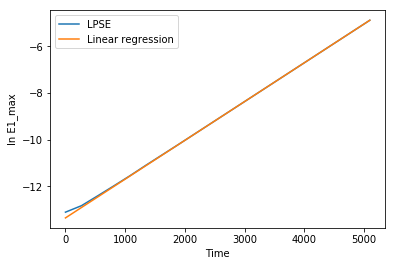

LPSE SRS growth rate is 1.659e-03
Undamped theory SRS growth rate is 3.461e-03
Landau damped theory SRS growth rate is 1.384e-03
LPSE relative error = 19.814%
Time taken: 36.179


In [17]:
t1 = stopwatch()
pfit = ihp.srs_growth_error(lpse,gamma,gamma0)
t2 = stopwatch()
print(f'Time taken: {t2-t1:0.3f}')

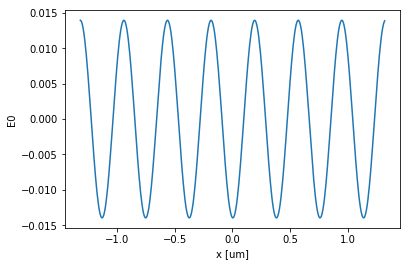

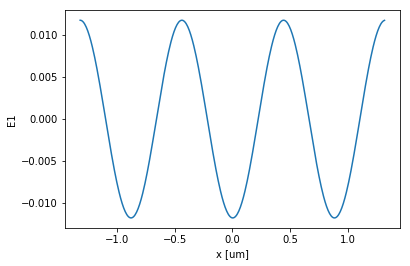

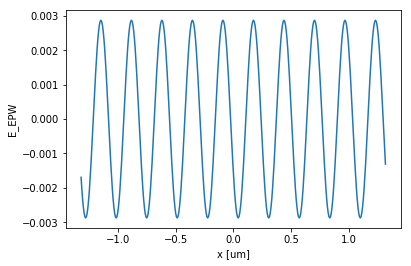

In [18]:
# Check E field of waves
datt = lpse.fdat['E0_z']
plt.plot(datt['x'],np.real(datt['data'][0]))
plt.xlabel('x [um]')
plt.ylabel('E0')
plt.show()
datt = lpse.fdat['E1_z']
xdat = datt['x']
ydat = np.real(datt['data'][-1])
plt.plot(xdat,ydat)
plt.xlabel('x [um]')
plt.ylabel('E1')
plt.show()
datt = lpse.fdat['pots']
xdat = datt['x']
ydat = np.real(datt['data'][-1])
plt.plot(xdat,ydat)
plt.xlabel('x [um]')
plt.ylabel('E_EPW')
plt.show()

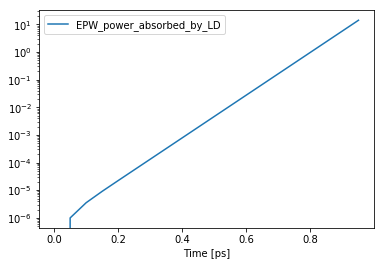

/warwick/desktop/2018/software/MPI/GCC/7.3.0-2.30/OpenMPI/3.1.1/matplotlib/3.0.0-Python-3.6.6/lib/python3.6/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


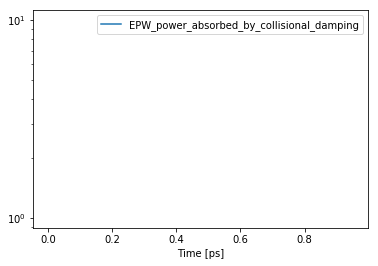

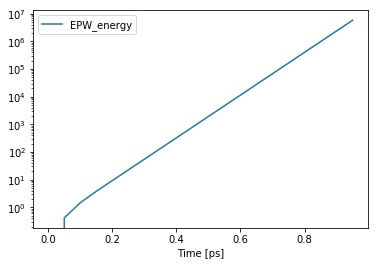

In [19]:
# LW absorption metrics
lpse.plot_metric('EPW_power_absorbed_by_LD',loglin=True)
lpse.plot_metric('EPW_power_absorbed_by_collisional_damping',loglin=True)
lpse.plot_metric('EPW_energy',loglin=True)

In [20]:
# See what value of k matches LPSE
import scipy.constants as scc
def seek_kfac(kfac):
  for i in lpse.setup_classes:
    if isinstance(i,wf.light_control):
      lambda0 = np.float64(i.laser.wavelength)*1.0e-6
    elif isinstance(i,wf.physical_parameters):
      den_frac = np.float64(i.densityProfile.NminOverNc)
      Te = np.float64(i.physical.Te)*1e3
    elif isinstance(i,wf.light_source):
      I0 = np.float64(i.laser.intensity[0])*1.0e4
  c = scc.c; e = scc.e; pi = scc.pi
  me = scc.m_e; epsilon0 = scc.epsilon_0
  Ek = Te*e/(me*c**2)
  vth = np.sqrt(Ek)

  # Laser wavenumber in plasma
  kvac = 2*pi/lambda0
  omega0 = 1.0
  omega_pe = np.sqrt(den_frac)*omega0
  k0 = np.sqrt(omega0**2-omega_pe**2)

  # # Use bisect method to find k roots of SRS dispersion relation
  def bsrs(ks):
    nonlocal omega_pe, vth, k0, omega0
    omega_ek = np.sqrt(omega_pe**2 + kfac*vth**2*(k0-ks)**2)
    res = (omega_ek-omega0)**2-ks**2-omega_pe**2
    return res
  ks = bisect(bsrs,-10,0) # Look for negative root for backscatter  

  # Get LW wavenumber by frequency matching and calculate remaining frequencies
  k_ek = k0 - ks
#   print(k0,ks,k_ek)
  omega_ek = np.sqrt(omega_pe**2 + kfac*vth**2*k_ek**2)
  omega_s = np.sqrt(omega_pe**2 + ks**2)
#   print(omega0,omega_ek,omega_s)

  # Get quiver velocity and maximum growth rate
  I0star = I0*e**2/(epsilon0*c**5*me**2*kvac**2)
  E0 = np.sqrt(2*I0star/omega0**2)
  vos = E0
  #vos = np.max(np.real(case.fdat['E0_z']['data'][0]))
  gamma0 = k_ek*vos/4*np.sqrt(abs(omega_pe**2/(omega_ek*(omega0-omega_ek))))

  # Get Landau damping and apply correction
  debye = np.sqrt(Ek/omega_pe**2)
  dk = debye*k_ek
  LD = np.sqrt(pi/8)*omega_pe/dk**3*(1+1.5*dk**2)*np.exp(-1.5)*np.exp(-0.5/dk**2)
  gamma = gamma0*np.sqrt(1+(0.5*LD/gamma0)**2)-LD/2
  return abs(gamma - pfit[0])
print(seek_kfac(5))

0.0007419968035906408


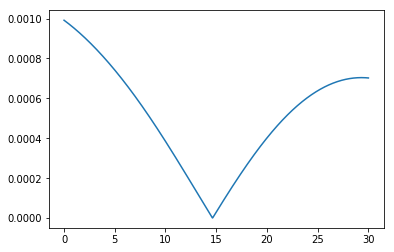

14.624624624624625


In [21]:
kfac = np.linspace(0,30,1000)
skf = [seek_kfac(i) for i in kfac]
plt.plot(kfac,skf)
plt.show()
amin = np.argmin(skf)
kfamin = kfac[amin]
print(kfamin)

In [22]:
# Get known theory results
undampedx = []; undampedy = []
dampedx = []; dampedy = []
with open('ihp_undamped.csv','r') as fp:
  for line in fp:
    lin = line.strip().split(',')
    undampedx.append(float(lin[0]))
    undampedy.append(float(lin[1]))
with open('ihp_landau_damped.csv','r') as fp:
  for line in fp:
    lin = line.strip().split(',')
    dampedx.append(float(lin[0]))
    dampedy.append(float(lin[1]))

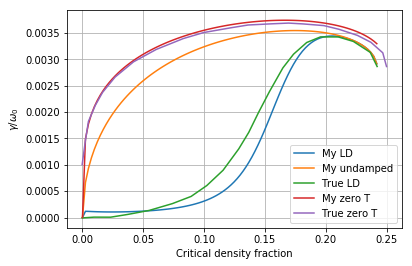

In [77]:
# Compare theory plots
dens,gammas,ktest,gamma0s,LDs = ihp.srs_theory_curve(lpse)
dens0,gammas0,ktest0,gamma0s0, scrp = ihp.srs_theory_curve(lpse,zerotemp=True)
plt.plot(dens,gammas,label='My LD')
# plt.plot(dens,LDs,label='My LD rate')
plt.plot(dens,gamma0s,label='My undamped')
plt.plot(dampedx,dampedy,label='True LD')
plt.plot(dens0,gammas0,label='My zero T')
plt.plot(undampedx,undampedy,label='True zero T')
plt.xlabel('Critical density fraction')
plt.ylabel(r'$\gamma/\omega_0$')
plt.legend()
plt.grid()
plt.show()